In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime

In [4]:
import os
os.listdir()

['.bash_profile',
 '.jupyter-blobs-v0.db',
 'raw.csv',
 '.Untitled.ipynb.sage-jupyter2',
 '.sage',
 '.config',
 '.cache',
 'Untitled.ipynb',
 '.smc',
 '.ssh',
 '.local',
 '.bashrc',
 '.ipython',
 '.snapshots']

In [5]:
df = pd.read_csv('raw.csv')

In [6]:
df.head()

Date 
 Serial 
 RawValue 
 
 
 
 
 0 
 2018-02-05T13:33:16.014912-05:00 
 28-000006794411 
 22187 
 
 
 1 
 2018-02-05T13:33:31.014395-05:00 
 28-000006794411 
 22187 
 
 
 2 
 2018-02-05T13:33:46.014433-05:00 
 28-000006794411 
 22187 
 
 
 3 
 2018-02-05T13:34:01.001281-05:00 
 28-000006794411 
 22187 
 
 
 4 
 2018-02-05T13:34:16.014052-05:00 
 28-000006794411 
 22187

In [7]:
df.tail()

Date 
 Serial 
 RawValue 
 
 
 
 
 37118 
 2018-02-08T00:32:35.814453-05:00 
 28-00000220db9f 
 36250 
 
 
 37119 
 2018-02-08T00:31:49.894421-05:00 
 28-000008ab5383 
 34312 
 
 
 37120 
 2018-02-08T00:32:04.934432-05:00 
 28-000008ab5383 
 34187 
 
 
 37121 
 2018-02-08T00:32:19.894856-05:00 
 28-000008ab5383 
 34125 
 
 
 37122 
 2018-02-08T00:32:34.934434-05:00 
 28-000008ab5383 
 34062

In [8]:
df.describe(include=['O'])

Date 
 Serial 
 
 
 
 
 count 
 37123 
 37123 
 
 
 unique 
 37123 
 4 
 
 
 top 
 2018-02-07T22:39:20.774438-05:00 
 10-000802b68231 
 
 
 freq 
 1 
 10608

In [9]:
df.info()
df[' Serial']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37123 entries, 0 to 37122
Data columns (total 3 columns):
Date         37123 non-null object
 Serial      37123 non-null object
 RawValue    37123 non-null int64
dtypes: int64(1), object(2)
memory usage: 870.1+ KB


0         28-000006794411
1         28-000006794411
2         28-000006794411
3         28-000006794411
4         28-000006794411
5         28-000006794411
6         28-000006794411
7         28-000006794411
8         28-000006794411
9         28-000006794411
10        28-000006794411
11        28-000006794411
12        28-000006794411
13        28-000006794411
14        28-000006794411
15        28-000006794411
16        28-000006794411
17        28-000006794411
18        28-000006794411
19        28-000006794411
20        28-000006794411
21        28-000006794411
22        28-000006794411
23        28-000006794411
24        28-000006794411
25        28-000006794411
26        28-000006794411
27        28-000006794411
28        28-000006794411
29        28-000006794411
               ...       
37093     28-00000220db9f
37094     28-00000220db9f
37095     28-000008ab5383
37096     28-000008ab5383
37097     28-000008ab5383
37098     28-000008ab5383
37099     10-000802b68231
37100     10

In [10]:
temp = df[['Date',' Serial',' RawValue']].groupby([' Serial'],as_index=False).mean()

In [11]:
temp.loc[0,' Serial']

' 10-000802b68231'

In [12]:
temp[' Serial']

0     10-000802b68231
1     28-00000220db9f
2     28-000006794411
3     28-000008ab5383
Name:  Serial, dtype: object

In [13]:
dfall = [pd.DataFrame({
    'Date': df.loc[df[' Serial']==temp.loc[0,' Serial'],'Date'].copy(),
    'RawValue': df.loc[df[' Serial']==temp.loc[0,' Serial'],' RawValue'].copy(),
})]
dfall[0].reset_index(inplace=True)
dfall[0]['DateTime'] = pd.to_datetime(dfall[0].Date,format='%Y-%m-%dT%H:%M:%S.%f')
for i in range(0,3):
    dfall.append(pd.DataFrame({
    'Date': df.loc[df[' Serial']==temp.loc[i+1,' Serial'],'Date'].copy(),
    'RawValue': df.loc[df[' Serial']==temp.loc[i+1,' Serial'],' RawValue'].copy(),
    }))
    dfall[i+1].reset_index(inplace=True)
    dfall[i+1]['DateTime'] = pd.to_datetime(dfall[i+1].Date,format='%Y-%m-%dT%H:%M:%S.%f')

In [22]:
dfall[0].head()

index 
 Date 
 RawValue 
 DateTime 
 
 
 
 
 0 
 224 
 2018-02-05T16:16:02.875448-05:00 
 19875 
 2018-02-05 21:16:02.875448 
 
 
 1 
 225 
 2018-02-05T16:16:17.915357-05:00 
 19875 
 2018-02-05 21:16:17.915357 
 
 
 2 
 226 
 2018-02-05T16:16:32.996151-05:00 
 19875 
 2018-02-05 21:16:32.996151 
 
 
 3 
 227 
 2018-02-05T16:16:47.915447-05:00 
 19875 
 2018-02-05 21:16:47.915447 
 
 
 4 
 236 
 2018-02-05T16:17:02.875560-05:00 
 19875 
 2018-02-05 21:17:02.875560

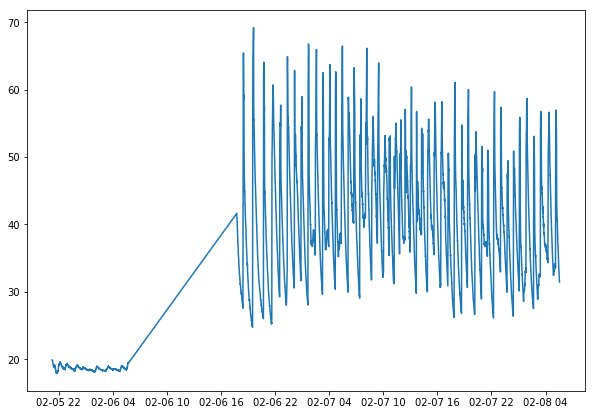

In [24]:
plt.figure(figsize=(10,7))
i = 0
dbegin = datetime(2017,2,6,18)
dbegin = datetime(2017,2,7,3)
dend = datetime(2019,2,7,12)
clipdata = (dfall[i].RawValue > 22000) & (dfall[i].DateTime < dend)
clipdata = (dfall[i].DateTime < dend) & (dfall[i].DateTime > dbegin)
tempdf = dfall[i][clipdata]
tempdf.reset_index(inplace=True)
x = tempdf.DateTime
y = tempdf.RawValue/1000
dtstart = x[0]
plt.plot(x,y)
plt.show()

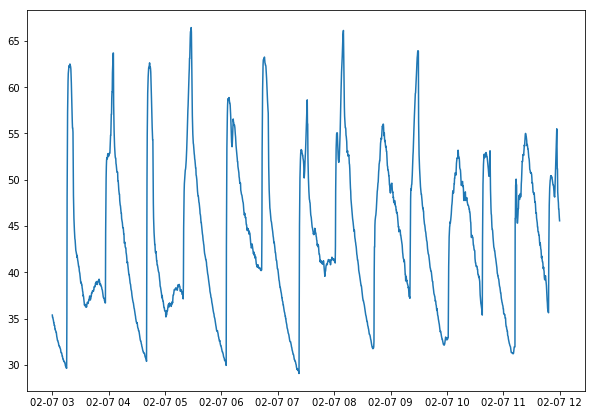

In [15]:
plt.figure(figsize=(10,7))
i = 0
dbegin = datetime(2018,2,6,18)
dbegin = datetime(2018,2,7,3)
dend = datetime(2018,2,7,12)
clipdata = (dfall[i].RawValue > 22000) & (dfall[i].DateTime < dend)
clipdata = (dfall[i].DateTime < dend) & (dfall[i].DateTime > dbegin)
tempdf = dfall[i][clipdata]
tempdf.reset_index(inplace=True)
x = tempdf.DateTime
y = tempdf.RawValue/1000
dtstart = x[0]
plt.plot(x,y)
plt.show()

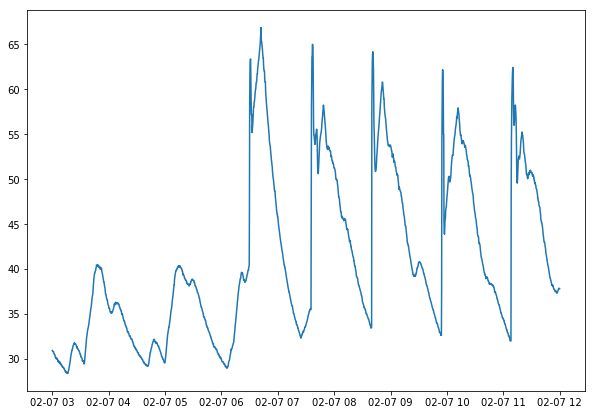

In [16]:
plt.figure(figsize=(10,7))
i = 1
clipdata = (dfall[i].DateTime < dend) & (dfall[i].DateTime > dbegin)
x1 = dfall[i][clipdata].DateTime
y1 = dfall[i][clipdata].RawValue/1000
plt.plot(x1,y1)
plt.show()

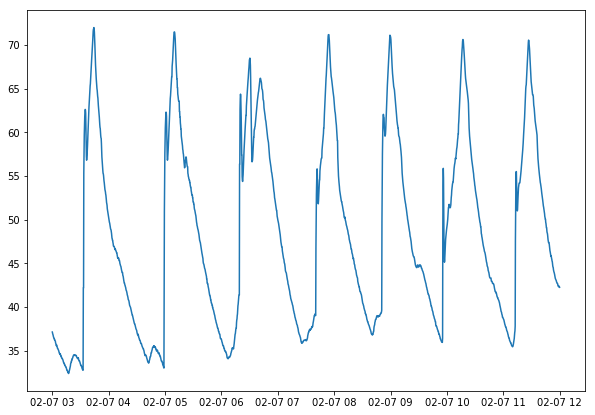

In [17]:
plt.figure(figsize=(10,7))
i = 3
clipdata = (dfall[i].DateTime < dend) & (dfall[i].DateTime > dbegin)
x3 = dfall[i][clipdata].DateTime
y3 = dfall[i][clipdata].RawValue/1000
plt.plot(x3,y3)
plt.show()

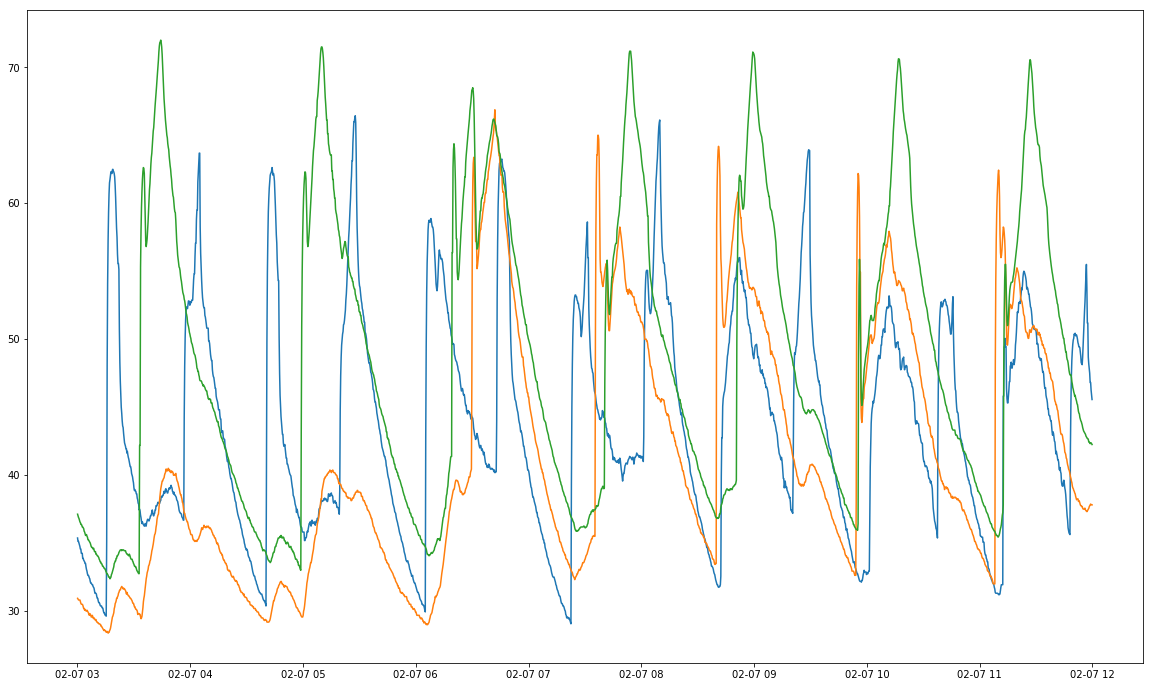

In [18]:
plt.figure(figsize=(20,12))
plt.plot(x,y,x1,y1,x3,y3)
plt.show()

In [19]:
dfall[1].DateTime[0]

Timestamp('2018-02-05 21:24:15.926087')

In [20]:
dtstart

Timestamp('2018-02-07 03:00:04.012627')

In [21]:
d

NameError: name 'd' is not defined